In [1]:
%matplotlib inline

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature

In [4]:
plot_directory = '/home/flanigan/temp/'

In [5]:
npd = npy.NumpyDirectory('/data/detectors/2017-03-13_145213_Tc.npd/')

In [6]:
npd.node_names()

['sweep']

In [7]:
sweep = npd.sweep

In [8]:
temperature.add_temperature(sweep, cryostat='HPD')

In [9]:
num_channels = sweep.stream_arrays[0].tone_index.size

In [10]:
T = []
epoch = []
s21 = defaultdict(list)
for sa in sweep.stream_arrays:
    T.append(sa.state.temperature.package)
    epoch.append(sa.start_epoch)
    for index in range(num_channels):
        s21[index].append(sa[index].s21_point)

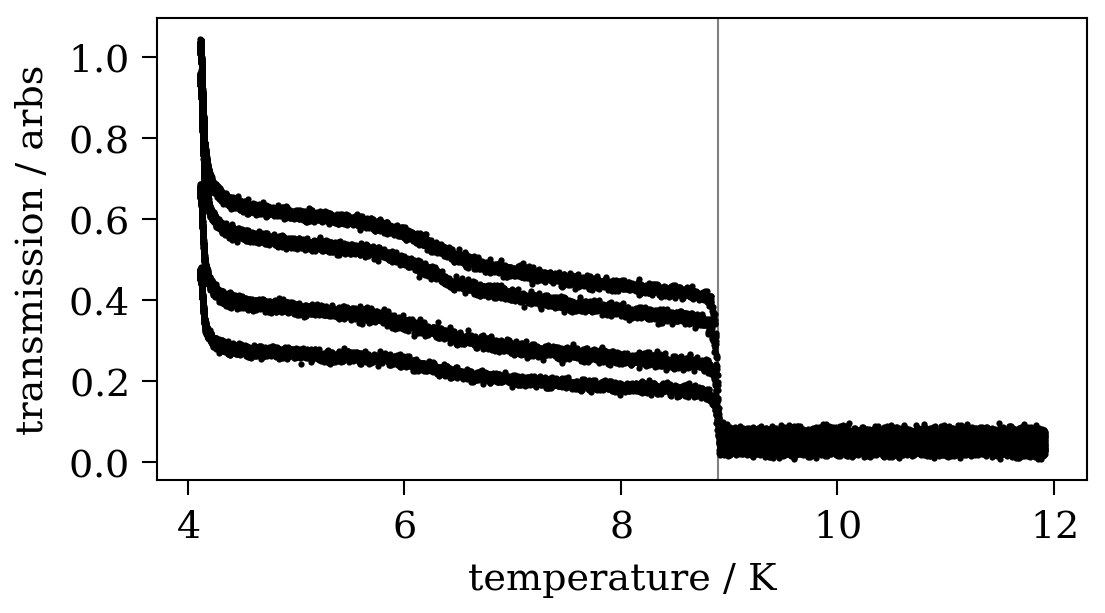

In [14]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.set_xlabel('temperature / K')
ax.set_ylabel('transmission / arbs')
ax.axvline(8.9, color='gray')

for index in range(num_channels):
    ax.plot(T, 1e3 * np.abs(s21[index]), '.k')

fig.savefig(plot_directory + 's21_vs_T_for_Tc.pdf')